Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8592 - loss: 0.5203 - val_accuracy: 0.9768 - val_loss: 0.0885
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9760 - loss: 0.0827 - val_accuracy: 0.9822 - val_loss: 0.0665
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9834 - loss: 0.0537 - val_accuracy: 0.9863 - val_loss: 0.0510
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9883 - loss: 0.0405 - val_accuracy: 0.9873 - val_loss: 0.0528
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9904 - loss: 0.0321 - val_accuracy: 0.9867 - val_loss: 0.0503
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9931 - loss: 0.0242 - val_accuracy: 0.9877 - val_loss: 0.0465
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9941 - loss: 0.0194 - val_accuracy: 0.9870 - val_loss: 0.0491
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9961 - loss: 0.0140 - val_accuracy: 0.

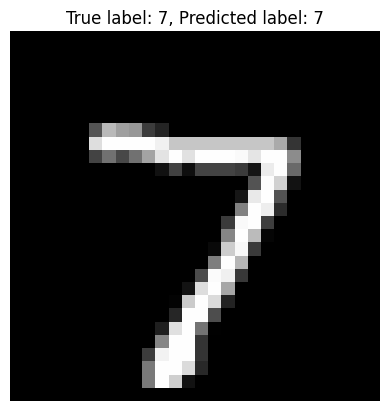

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Preprocess the data by reshaping it into a 4D tensor
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
# Build the model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,
28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Predict the class of an image
predictions = model.predict(x_test[:1])
# Get the class with the highest probability
predicted_label = np.argmax(predictions[0])
# Plot the image and its predicted label
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title("True label: %d, Predicted label: %d" % (np.argmax(y_test[0]), predicted_label))
plt.axis('off')
plt.show()